# Make sure you are in the correct directory, the load these two

In [46]:
reload("Initial.jl")
reload("Symplectic.jl")

The easiest way to get a stabilised state is to use the symplectic command
This is a one-one mapping between the integers and the cliffords
For each 'symplectic' there the X, and Z maps can be +1 or -1 which means
There are an additional 2^d*2^d cliffords 'per' symplectic

- So symplectic(62345,7) gives you the mapping for 7 qubit, symplectic 62345
- then stabiliseSymp(X,28), gives you the stabilised version of X, with the bit pattern X
- maybe easiest to see in the one qubit system.
- here remember there are 24 cliffords, being 6 * (2*2)


In [47]:
symp=symplectic(1,1) # get the first symplectic of a 1 qubit system.

2x2 Array{Int64,2}:
 0  1
 1  0

In [48]:
output(stabiliseSymp(symp,0)) # stabilise it with the bit string 0 (i.e. +X, +Z)

+Z
--
+X


In [49]:
output(stabiliseSymp(symp,1)) # stabilise it with the bit string 1

-Z
--
+X


In [50]:
output(stabiliseSymp(symp,2)) # and so on
print("==========\n")
output(stabiliseSymp(symp,3)) 

+Z
--
-X
-Z
--
-X


Note that it wraps

In [51]:
for i in 1:7
    print("\n==========\n")
    print(symplectic(i,1))
end


[0 1
 1 0]
[1 1
 1 0]
[1 0
 1 1]
[0 1
 1 1]
[1 1
 0 1]
[1 0
 0 1]
[0 1
 1 0]

##Lets do something more fun, move up to 7 qubits

In [52]:
state=stabiliseSymp(symplectic(62345,7),231) 


14x15 Array{Int32,2}:
 1  1  0  0  1  0  1  0  1  0  1  1  0  1  1
 1  0  0  0  1  0  1  0  0  0  1  1  0  1  1
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  1  1  0  1  1  1  0  1  1  0  1  0
 0  1  0  0  0  0  1  1  1  0  1  1  0  1  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1
 0  1  0  0  1  0  0  1  1  0  1  1  0  1  1
 0  1  0  0  1  0  1  0  0  0  1  1  0  1  1
 0  1  0  0  1  0  1  1  0  0  1  1  0  1  1
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  1  0  0  1  0  1  1  1  0  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  1
 0  1  0  0  1  0  1  1  1  0  1  1  0  0  1

##The raw state isnt very readable , output splits it into stabilizers (bottom) and anti-stabilisers (top)

In [53]:
output(state)

-XYIZYIY
-XIIZYIY
-IIXIIII
+ZYIYYIY
+ZYIZZIY
-IIIIIXI
-ZYIZYIZ
--------
-IXIZYIY
-ZXIZYIY
+IIZIIII
+IIIZIII
-ZYIZXIY
-IIIIIZI
-ZYIZYIX


## We can decompose it into one/two qubit component gates

In [54]:
decomposeState(state)

Tableau for unitary: 
-XYIZYIY
-XIIZYIY
-IIXIIII
+ZYIYYIY
+ZYIZZIY
-IIIIIXI
-ZYIZYIZ
--------
-IXIZYIY
-ZXIZYIY
+IIZIIII
+IIIZIII
-ZYIZXIY
-IIIIIZI
-ZYIZYIX
setup(7)
cnot(7,5)
cnot(7,4)
cnot(7,2)
cnot(2,1)
phase(5)
phase(5)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,2)
phase(2)
cnot(7,1)
cnot(2,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
hadamard(7)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(6)
phase(5)
phase(2)
phase(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(6)
phase(5)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,1)
cnot(5,4)
cnot(5,1)
cnot(4,7)
cnot(4,5)
cnot(4,1)
cnot(5,4)
cnot(2,7)
cnot(2,5)
cnot(2,4)
cnot(4,2)
cnot(1,7)
cnot(1,5)
cnot(1,4)
cnot(4,1)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
output(svec)


In [55]:
decompose(62345,212,7,false,false) # This is the same thing, just all combined

Tableau for unitary: 
+XYIZYIY
+XIIZYIY
-IIXIIII
+ZYIYYIY
-ZYIZZIY
+IIIIIXI
-ZYIZYIZ
--------
+IXIZYIY
-ZXIZYIY
+IIZIIII
-IIIZIII
+ZYIZXIY
-IIIIIZI
-ZYIZYIX
setup(7)
cnot(7,5)
cnot(7,4)
cnot(7,2)
cnot(2,1)
phase(6)
phase(6)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,2)
phase(2)
cnot(7,1)
cnot(2,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
hadamard(7)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(3)
hadamard(2)
hadamard(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(7)
phase(5)
phase(5)
phase(3)
phase(3)
phase(1)
phase(1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
phase(7)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,1)
cnot(5,4)
cnot(5,1)
cnot(4,7)
cnot(4,5)
cnot(4,1)
cnot(5,4)
cnot(2,7)
cnot(2,5)
cnot(2,4)
cnot(4,2)
cnot(1,7)
cnot(1,5)
cnot(1,4)
cnot(4,1)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(3)
hadamard(2)
hadamard(1)
output(

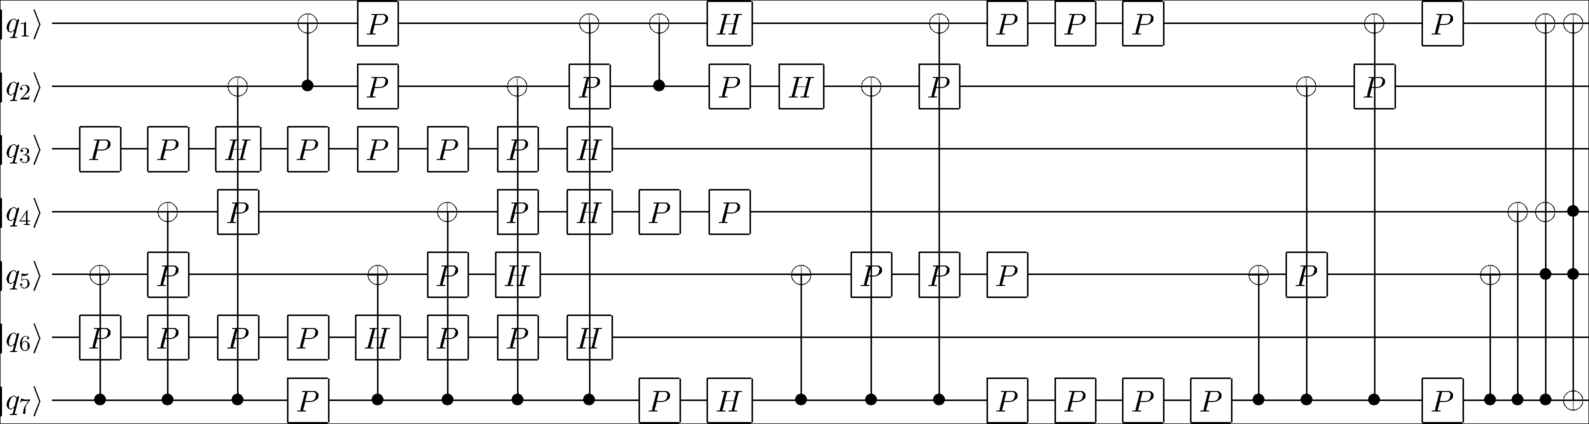

In [56]:
drawCircuit() # lets see what that looks like

In [57]:
commands # This is the global containing the gates that make it up


86-element Array{ASCIIString,1}:
 "setup(7)"    
 "cnot(7,5)"   
 "cnot(7,4)"   
 "cnot(7,2)"   
 "cnot(2,1)"   
 "phase(6)"    
 "phase(6)"    
 "phase(7)"    
 "phase(6)"    
 "phase(5)"    
 "phase(4)"    
 "phase(3)"    
 "phase(2)"    
 ⋮             
 "cnot(4,2)"   
 "cnot(1,7)"   
 "cnot(1,5)"   
 "cnot(1,4)"   
 "cnot(4,1)"   
 "hadamard(6)" 
 "hadamard(5)" 
 "hadamard(4)" 
 "hadamard(3)" 
 "hadamard(2)" 
 "hadamard(1)" 
 "output(svec)"

## Note the redundant gates (i.e. 4 phases on the same qubit in a row)

In [58]:
decompose(62345,212,7) # Without the second false, we will try and rationalise a bit

Tableau for unitary: 
+XYIZYIY
+XIIZYIY
-IIXIIII
+ZYIYYIY
-ZYIZZIY
+IIIIIXI
-ZYIZYIZ
--------
+IXIZYIY
-ZXIZYIY
+IIZIIII
-IIIZIII
+ZYIZXIY
-IIIIIZI
-ZYIZYIX
setup(7)
cnot(7,5)
cnot(7,4)
cnot(7,2)
cnot(2,1)
phase(7)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,2)
phase(2)
cnot(7,1)
cnot(2,1)
phase(7)
phase(5)
phase(4)
phase(3)
phase(2)
hadamard(7)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(5)
phase(5)
phase(1)
phase(1)
phase(6)
phase(5)
phase(4)
phase(2)
phase(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,1)
cnot(5,4)
cnot(5,1)
cnot(4,7)
cnot(4,5)
cnot(4,1)
cnot(5,4)
cnot(2,7)
cnot(2,5)
cnot(2,4)
cnot(4,2)
cnot(1,7)
cnot(1,5)
cnot(1,4)
cnot(4,1)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
output(svec)


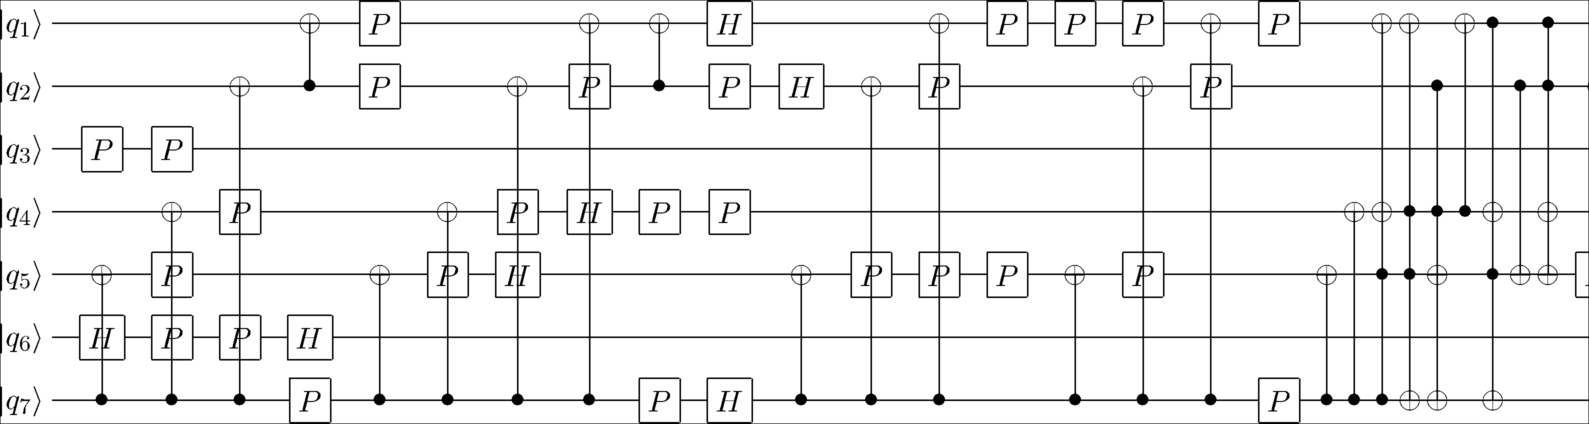

In [59]:
drawCircuit() # a little bit shorter